<a href="https://colab.research.google.com/github/VysakhDevadas/Daily-Data-science/blob/main/Polynomial_regression_using_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate


In [53]:
data = pd.read_csv('dataset.csv')
data.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [54]:
x = data[['x']].values
y = data.y.values

In [55]:
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.75, random_state = 1)

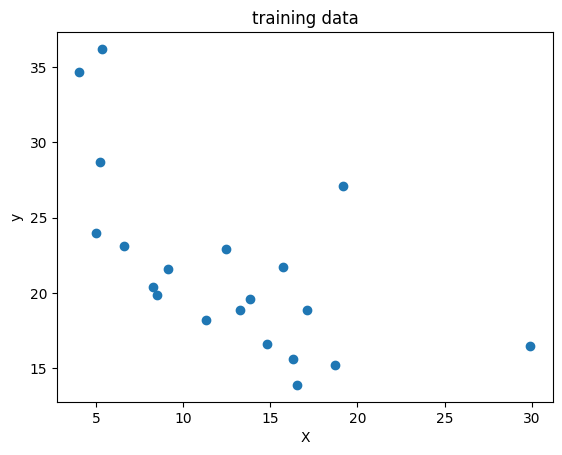

In [56]:
plt.scatter(x_train,y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.title('training data')
plt.show()

In [57]:
maxdegree = 20
training_error, val_error, cross_validate_error = [],[],[]
for d in range(maxdegree):
  x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)
  x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
  x_poly = PolynomialFeatures(degree = d).fit_transform(x)
  lr = LinearRegression(fit_intercept = False)
  lr.fit(x_poly_train,y_train)
  y_train_pred = lr.predict(x_poly_train)
  y_val_pred = lr.predict(x_poly_val)
  training_mse = mean_squared_error(y_train,y_train_pred)
  val_mse = mean_squared_error(y_val,y_val_pred)
  training_error.append(training_mse)
  val_error.append(val_mse)
  mse_cv = cross_validate(lr, x_poly, y, scoring = 'neg_mean_squared_error', cv = 10, return_train_score = False)
  cross_validate_error.append(np.mean(-1*mse_cv['test_score']))
  

In [58]:
best_degree = val_error.index(min(val_error))
best_degree

2

In [59]:
best_degree = cross_validate_error.index(min(cross_validate_error))
best_degree

2

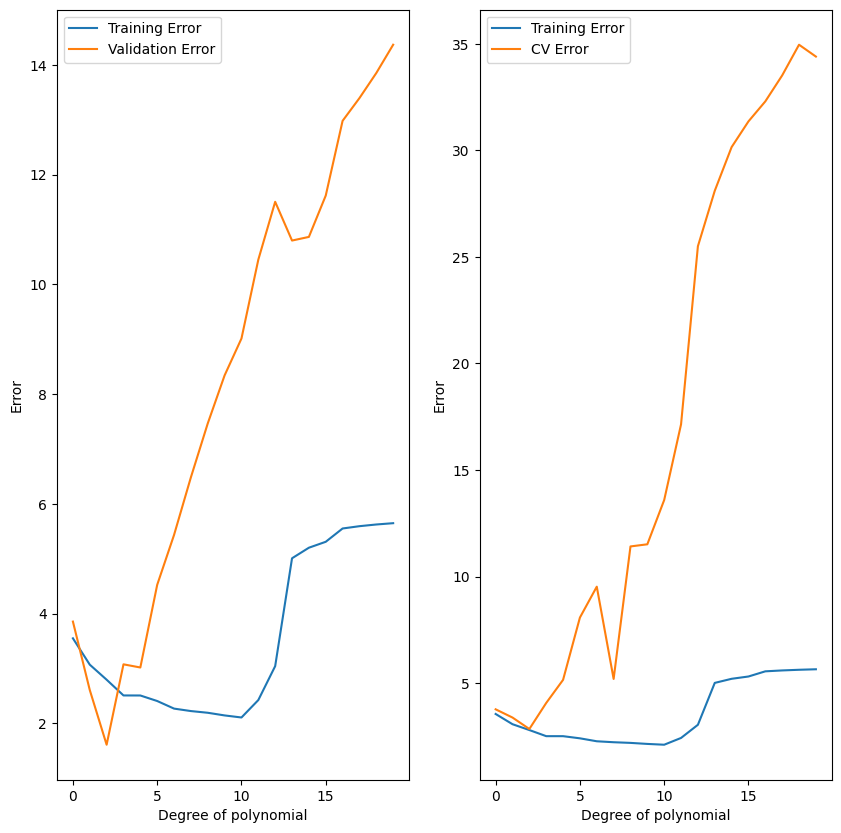

In [64]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].plot(range(maxdegree), np.log(training_error), label = 'Training Error')
ax[0].plot(range(maxdegree), np.log(val_error), label = 'Validation Error')
ax[0].set_xlabel('Degree of polynomial')
ax[0].set_ylabel('Error')
ax[0].legend()

ax[1].plot(range(maxdegree), np.log(training_error), label = 'Training Error')
ax[1].plot(range(maxdegree), np.log(cross_validate_error), label = 'CV Error')
ax[1].set_xlabel('Degree of polynomial')
ax[1].set_ylabel('Error')
ax[1].legend()